In [2]:
#import libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
#loading the MNIST dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
#3d array
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

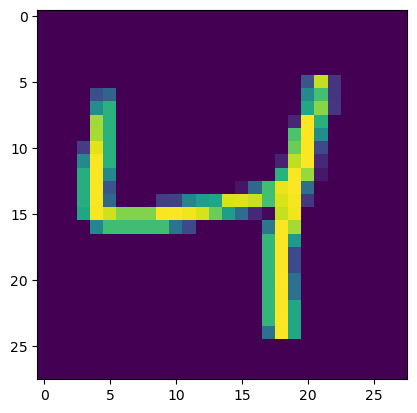

In [6]:
#visualizing the 2nd element
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [7]:
#Normaliztion or scaling
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
#converting multidimensional input to one dimensional array
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
#training the model
history= model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2872 - accuracy: 0.9167 - val_loss: 0.1476 - val_accuracy: 0.9578
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1196 - accuracy: 0.9632 - val_loss: 0.1184 - val_accuracy: 0.9649
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0813 - accuracy: 0.9751 - val_loss: 0.0991 - val_accuracy: 0.9700
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0632 - accuracy: 0.9799 - val_loss: 0.0947 - val_accuracy: 0.9715
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9850 - val_loss: 0.0959 - val_accuracy: 0.9726
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0966 - val_accuracy: 0.9734
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.1009 - val_accuracy:

In [13]:
#making predictions
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [14]:
# predicting class labels based on predicted class probabilities
y_pred = y_prob.argmax(axis=1)

In [15]:
# Calculating accuaracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777

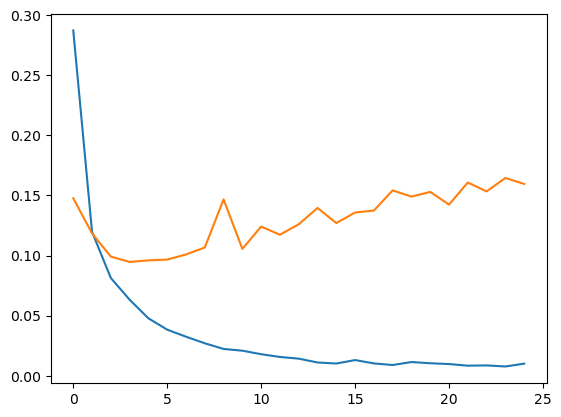

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

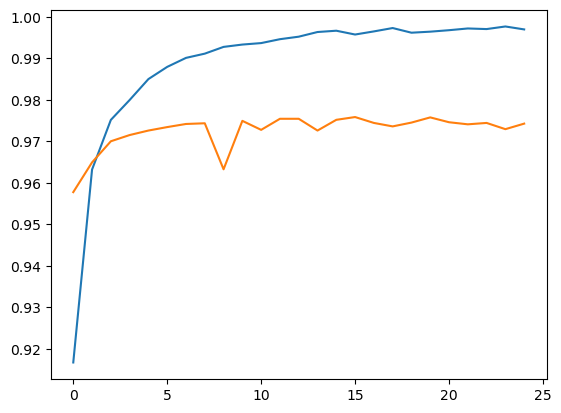

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])